# Image Classification using CNN

##Background
The effort so far has pretty much  been on understanding the classical machine learning algorithms and ofcourse, bringing them to life with some nicer and neater implementations. Give yourself a pat on the back......great job thus far! With your favourite story teller Prajwal Singh (kudos to him) taking a break from his story, we invite you to take a dive into some deep learning stuff. But don't worry, we assure you that he will be back with his story soon.<br> <br> We now move towards understanding and implementing the Convolutional Neural Networks (CNN). Just to give you a background, the advent of the idea of CNNs dates back to 1959, when David Hubel and Torsten Wiesel described “simple cells” and “complex cells” in the human visual cortex. They proposed in 1962 that complex cells achieve spatial invariance by “summing” the output of several simple cells that all prefer the same orientation but different receptive fields (e.g. bottom, middle, or top of an image). By collecting information from a bunch of simple cell minions, the complex cells can respond to horizontal bars that occur anywhere. This concept — that simple detectors can be “summed” to create more complex detectors — is found throughout the human visual system, and is also the fundamental basis of convolution neural network models. <br> <br> Inspired by this idea, networks like LENet and AlexNet were introduced to mark the foundation of modern convolutional neural networks. Ofcourse, after that we witnessed a plenty of new architectures (VGGNet, ResNet, etc), so many in number that the space will get flooded if we try to list them all down.

##Image Classification

Well...you know it already, but just for the sake of completeness - <i>Image classification is the task of assigning a label to an input image from a fixed set of classes.</i> For instance, in the following figure, an image classification model takes in an input image from a dataset and assigns a label to it from the given classes in the dataset. Clearly, that's what you will be doing!<br><br><br>




<img src='https://rishabhjain.xyz/ml-class-project/public/images/cat_mod.png' type='image'>


##Objective

Let's implement [VGG19](https://arxiv.org/pdf/1409.1556.pdf) and
and [ResNet](https://arxiv.org/pdf/1512.03385.pdf) on the CIFAR10 dataset for image classification and also compare their performance with a simple n-layer feedforward neural network (as you must have done in the last assignment. However, we will do so under two experimental settings.

**Dataset**

We will again use the CIFAR-10 dataset. This dataset consists of 60,000 RGB images of size 32x32. The images belong to objects of 10 classes such as frogs, horses, ships, trucks etc. The dataset is divided into 50,000 training images and 10,000 testing images. Among the training images, we used 49,000 images for training and 1000 images for validation. <img src='https://rishabhjain.xyz/ml-class-project/public/images/cifar-10.png' type='image'>

**Experimental Settings**

* **Supervised Learning**: Since we have labels for all images, we will use supervised learning to solve this task. Here, we will use all 49,000 training samples with their labels for supervised learning.

* **Semi-supervised Learning**: It comes handy when we have a dataset that is partially labelled or we want to use a pool of unlabeled data for training. To simulate this setting, we will split the CIFAR-10 training data into 2 parts, 5,000 images which have labels and the rest 44,000 images which are treated as unlabeled images. We shall use <i>self-training</i> as a wrapper on supervised learning technique for semi-supervised learning.


**What is Self Training?**

Self-Training is a technique which can be applied to any supervised learning algorithm to train it in a semi-supervised fashion. The algorithm first uses the labeled data to train the model. After training it for few iterations, some part of unlabled data is labeled using the trained model and is added to the set of labeled training data for the next iteration.

##Implementation Details

**Libraries**

This time we give you freedom to choose between [Pytorch](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) and [Tensorflow](https://www.tensorflow.org/tutorials/images/cnn). Go through these links to get acquainted yourself with the frameworks and decide on your choice. Make sure you follow more or less the same format while coding in either of the two deep learning libraries.

**Data Augmentation**

It is the process of preprocessing the data before feeding it to the model. It increases the diversity of the data which allows the model to generalize well and results in higher accuracy. We will primarily do the following three types of modification on the dataset.

* Random Crop: Add sufficient padding to the original image and then randomly crop to create a new image.
* Random Horizontal Flip: The original image is randomly flipped horizontally to produce new image.
* Resizing the Original Image: The original image will be resized to a different shape. Some deep neural networks require the image to be of sufficient size due to multiple down-sampling layers in the architecture.

**Hyperparameter Optimization**

The accuracy of any particular model depends on the careful selection of the optimizer and the parameters that optimizer depends on, such as learning rate, momentum for Stochastic Gradient Descent, weight decays, and batch size.

To find the optimum value of these hyperparameters, vary these hyperparameters over a certain range and track the accuracy of the model on the validation dataset.

For instance, the following figure shows the performance of a sample ResNet model with different learning rates for Adam optimizer. We can clearly see that model performs best at the learning rate of 0.001. Other learning rates are either too small or too large for the model to converge.

<img src='https://rishabhjain.xyz/ml-class-project/public/images/supervised_model_performance/learningRateTuning.svg' type='image'>


## Deliverables

* Perform image classifcation over CIFAR10 dataset using VGG19, ResNet18, and an n-layer MLP. Compare their performances by reporting the confusion matrices.

* Compare the model performance under the two settings (described above) and report your observations. Note: Do include the optimum values for the hyperparameters and show the plots (as above) justifying your choice.

* Include the training plots (Train loss vs Epochs) for each of the trained models.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import cv2
import torch.nn as nn
import torch.nn.functional as F
import math


In [ ]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP,self).__init__()
    self.lin1 = nn.Linear(64 * 64 * 3, 128)
    self.lin2 = nn.Linear(128, 256)
    self.lin3 = nn.Linear(256, 512)
    self.lin4 = nn.Linear(512, 256)
    self.lin5 = nn.Linear(256, 128)
    self.lin6 = nn.Linear(128, 64)
    self.lin7 = nn.Linear(64, 10)


  def forward(self, x):
    x = torch.flatten(x, 1)
    x = F.relu(self.lin1(x))
    x = F.relu(self.lin2(x))
    x = F.relu(self.lin3(x))
    x = F.relu(self.lin4(x))
    x = F.relu(self.lin5(x))
    x = F.relu(self.lin6(x))
    x = self.lin7(x)
    return x


In [ ]:
transform_train = transforms.Compose(
    [transforms.RandomHorizontalFlip(),
     transforms.RandomCrop(size=32, padding=4),
     transforms.Resize((64,64)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
transform_test = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize((64,64)),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 16

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print(len(trainloader))
print(len(testloader))

Files already downloaded and verified
Files already downloaded and verified
3125
625


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = MLP().to(device)
print(net)

MLP(
  (lin1): Linear(in_features=12288, out_features=128, bias=True)
  (lin2): Linear(in_features=128, out_features=256, bias=True)
  (lin3): Linear(in_features=256, out_features=512, bias=True)
  (lin4): Linear(in_features=512, out_features=256, bias=True)
  (lin5): Linear(in_features=256, out_features=128, bias=True)
  (lin6): Linear(in_features=128, out_features=64, bias=True)
  (lin7): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
from tqdm import tqdm
epoch_losses = [] # using this to record the training loss so that we can plot it against the epoch
net.train()
for epoch in range(10):
    print("Epoch:", epoch)
    print("-"*100)
    running_loss = 0.0
    saved_loss = 0.0
    for images,labels in tqdm(trainloader):
        # get inputs and labels and convert to appropriate device
        inputs, labels = images,labels
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print stats
        running_loss += loss.item()
    #if i % 2000 == 1999:  # print every 2000 mini-batches
    print('loss: %.3f' %(running_loss/len(trainloader)))
    saved_loss = running_loss
    epoch_losses.append(saved_loss)
print('Training done!')

Epoch: 0
----------------------------------------------------------------------------------------------------


100%|██████████| 3125/3125 [00:46<00:00, 67.15it/s]


loss: 2.252
Epoch: 1
----------------------------------------------------------------------------------------------------


100%|██████████| 3125/3125 [00:45<00:00, 68.64it/s]


loss: 1.978
Epoch: 2
----------------------------------------------------------------------------------------------------


100%|██████████| 3125/3125 [00:45<00:00, 68.45it/s]


loss: 1.833
Epoch: 3
----------------------------------------------------------------------------------------------------


100%|██████████| 3125/3125 [00:45<00:00, 68.00it/s]


loss: 1.729
Epoch: 4
----------------------------------------------------------------------------------------------------


100%|██████████| 3125/3125 [00:46<00:00, 67.91it/s]


loss: 1.661
Epoch: 5
----------------------------------------------------------------------------------------------------


100%|██████████| 3125/3125 [00:46<00:00, 67.87it/s]


loss: 1.607
Epoch: 6
----------------------------------------------------------------------------------------------------


100%|██████████| 3125/3125 [00:46<00:00, 67.70it/s]


loss: 1.561
Epoch: 7
----------------------------------------------------------------------------------------------------


100%|██████████| 3125/3125 [00:45<00:00, 67.95it/s]


loss: 1.529
Epoch: 8
----------------------------------------------------------------------------------------------------


100%|██████████| 3125/3125 [00:45<00:00, 68.22it/s]


loss: 1.505
Epoch: 9
----------------------------------------------------------------------------------------------------


100%|██████████| 3125/3125 [00:46<00:00, 67.65it/s]

loss: 1.478
Training done!


In [ ]:

net.eval()
#test_loss = []
correct = 0
total = 0
running_loss = 0.0
for images,labels in tqdm(testloader):
        # get inputs and labels and convert to appropriate device
        inputs, labels =  images.to(device),labels.to(device)

        # zero the parameter gradients
        # optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        # loss.backward()
        # optimizer.step()

        # print stats
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    #if i % 2000 == 1999:  # print every 2000 mini-batches
print('loss: %.3f' %(running_loss/len(testloader)))
print('test done!')
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

100%|██████████| 625/625 [00:06<00:00, 95.57it/s]

loss: 1.433
test done!
Accuracy of the network on the 10000 test images: 48 %


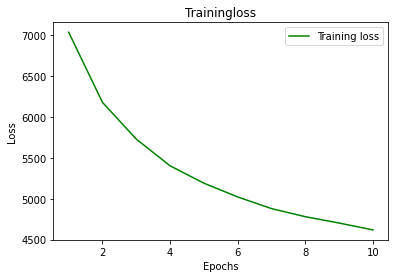

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
epochs = range(1,11)
plt.plot(epochs, epoch_losses, 'g', label='Training loss')
plt.title('Trainingloss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from tqdm import tqdm
epoch_losses = [] # using this to record the training loss so that we can plot it against the epoch
net.train()
for epoch in range(10):
    print("Epoch:", epoch)
    print("-"*100)
    running_loss = 0.0
    saved_loss = 0.0

    for images,labels in tqdm(trainloader):
        # get inputs and labels and convert to appropriate device
        inputs, labels = images,labels
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print stats
        running_loss += loss.item()
    #if i % 2000 == 1999:  # print every 2000 mini-batches
    print('loss: %.3f' %(running_loss/len(trainloader)))
    saved_loss = running_loss
    epoch_losses.append(saved_loss)
print('Training done!')